In [2]:
#Célula para importação de bibliotecas e APIs


#Conjunto de funções para trabalhar com arquivos
import os
import sys
sys.path.append("/home/tiagohbalves/Documentos/Audio_Files/Bruna/Afirmacao")


#Conjunto de funcoes para plot
import matplotlib.pyplot as plt


#Conjunto de funcoes para estrair o pitch
import f0_praat

#Conjunto de funções matemáticas
import numpy


#Conjunto de funcoes auxiliares caso necessário
import auxiliar_codes


#Sci-kit learn
import sklearn





In [3]:
#Célula para lê os diretórios e arquivos a serem utilizados



# The name of the audio file
files_perg = [];
files_afirm =[];

#The name of the directory of audio files
dire_afirm = "/home/tiagohbalves/Documentos/Audio_Files/Bruna/Afirmacao_1";
dire_perg = "/home/tiagohbalves/Documentos/Audio_Files/Bruna/Interrogacao_1";


for file in os.listdir(dire_afirm):
    if file.endswith(".wav"):
        files_afirm.append("/"+file);

files_afirm.sort();
files_perg=files_afirm;


tempo_afirm = numpy.loadtxt(open("/home/tiagohbalves/Documentos/Dados/tempos_afirmacao_1.csv","rb"),delimiter=",")
tempo_perg = numpy.loadtxt(open("/home/tiagohbalves/Documentos/Dados/tempos_pergunta_1.csv","rb"),delimiter=",")

tempo_afirm = (tempo_afirm*100);
tempo_afirm = tempo_afirm.astype(int);
tempo_perg = tempo_perg*100;
tempo_perg = tempo_perg.astype(int);

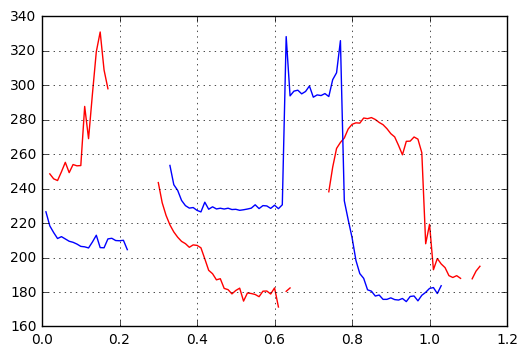

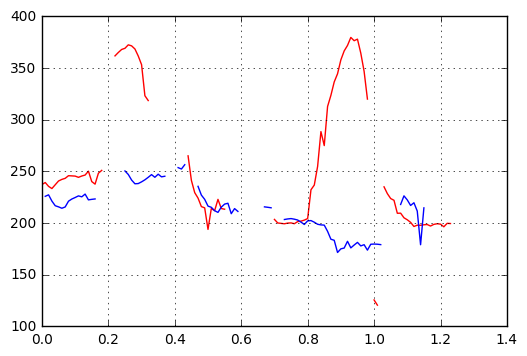

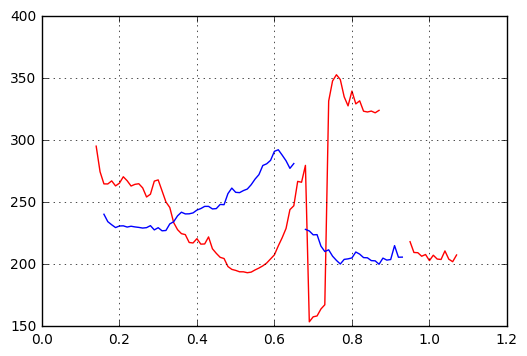

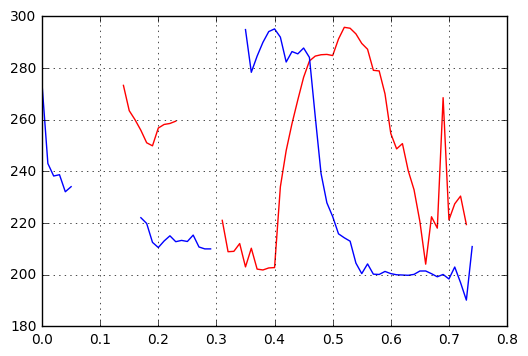

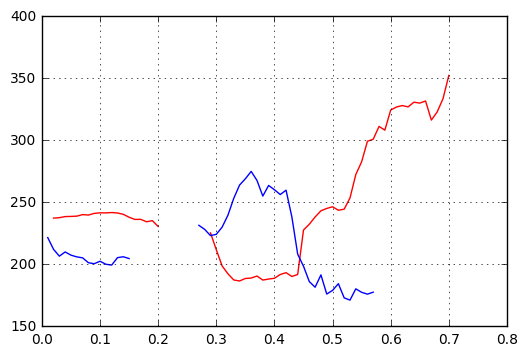

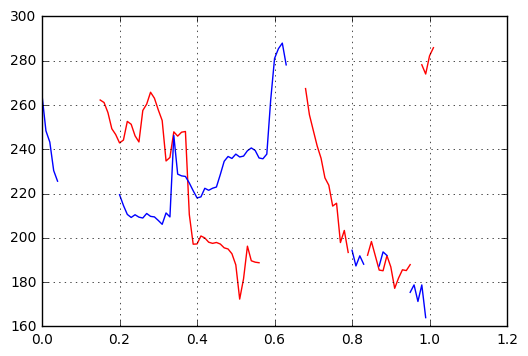

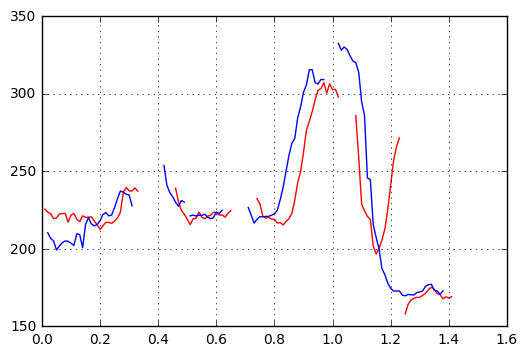

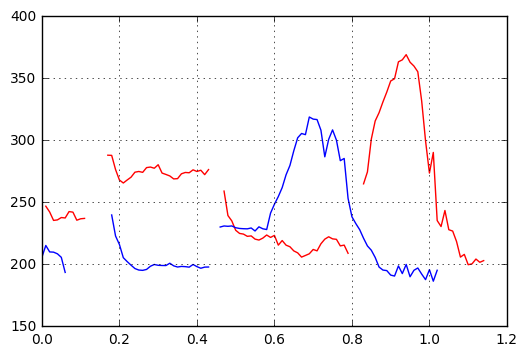

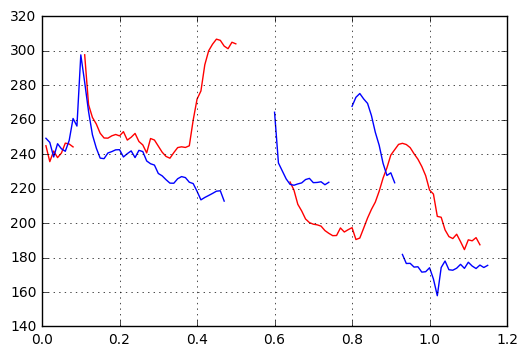

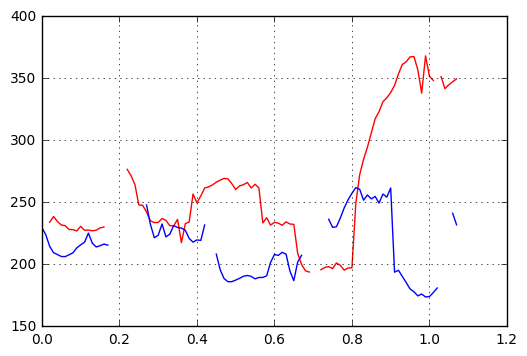

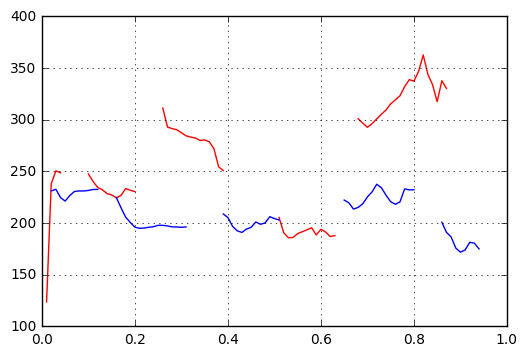

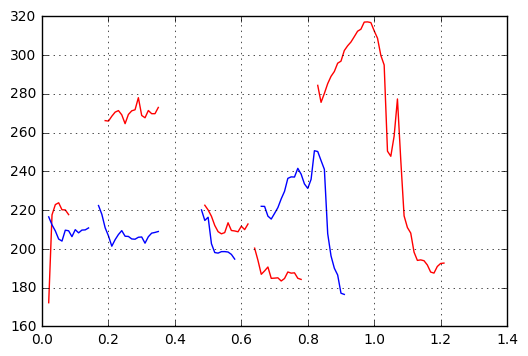

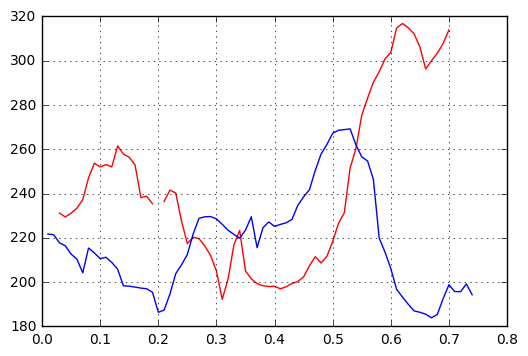

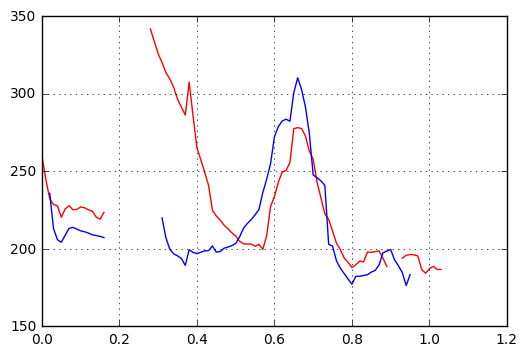

In [10]:
#The base rate
srate = 100.0;

# The pitch range to be used by the pitch extraction algorithm
#pitch_range = (150, 500);
#pitch_range = (40, 500);
pitch_range = (140, 400);

# Parameters for Praat's pitch extraction algorithm
input_parms = {};
input_parms["time_step"]     = 1.0/srate;
input_parms["pitch_floor"]   = pitch_range[0];
input_parms["pitch_ceiling"] = pitch_range[1];

#audio_file=dire_afirm+files_perg[0];


i = 0

t = numpy.arange(0.0,20.0,1/srate)

for i in range(0,14):
    audio_file_perg = dire_perg+files_perg[i];
    audio_file_afirm= dire_afirm+files_afirm[i];

    #  Extract the F0 signal
    (f0_signal_perg,f0_time_perg,f0_parms) = f0_praat.compute_f0_praat(audio_file_perg,input_parms);
    (f0_signal_afirm,f0_time_afirm,f0_parms) = f0_praat.compute_f0_praat(audio_file_afirm,input_parms);
    
    
    # Plot the F0 signal
    plt.plot(t[range(0,(tempo_perg[i,1] - tempo_perg[i,0]))], f0_signal_perg[range(tempo_perg[i,0],tempo_perg[i,1])],'r-',
             t[range(0,(tempo_afirm[i,1]) - tempo_afirm[i,0])],f0_signal_afirm[range(tempo_afirm[i,0],tempo_afirm[i,1])],'b-');
    plt.grid("on");
    plt.show();
    plt.savefig


In [4]:
len(f0_signal_perg)

246

In [5]:
tempo_perg[i,0]


63

In [6]:
tempo_perg[i,1]

167

In [7]:
len(f0_signal_afirm)

265

In [8]:
tempo_afirm[i,0]

67

In [9]:
tempo_afirm[i,1]

164

In [10]:
tempo_afirm

array([[113, 217],
       [119, 236],
       [229, 323],
       [100, 176],
       [125, 184],
       [ 66, 167],
       [ 54, 193],
       [ 72, 177],
       [119, 236],
       [ 42, 150],
       [ 30, 155],
       [152, 269],
       [ 92, 181],
       [ 67, 164]])

In [11]:
tempo_perg

array([[115, 229],
       [ 94, 223],
       [131, 240],
       [ 61, 135],
       [189, 260],
       [114, 216],
       [107, 250],
       [ 62, 177],
       [ 30, 155],
       [209, 322],
       [ 60, 173],
       [101, 225],
       [146, 246],
       [ 63, 167]])

In [12]:
t = numpy.asmatrix(t)

In [14]:
f0_signal_afirm

array([          nan,           nan,           nan,           nan,
                 nan,           nan,           nan,           nan,
                 nan,           nan,           nan,           nan,
                 nan,           nan,           nan,           nan,
                 nan,           nan,           nan,           nan,
                 nan,           nan,           nan,           nan,
                 nan,           nan,           nan,           nan,
                 nan,           nan,           nan,           nan,
                 nan,           nan,           nan,           nan,
                 nan,           nan,           nan,           nan,
                 nan,           nan,           nan,           nan,
                 nan,           nan,           nan,           nan,
                 nan,           nan,           nan,           nan,
                 nan,           nan,           nan,           nan,
                 nan,           nan,           nan,           

In [ ]:
t[1]